In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Check out the Data

In [36]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [38]:
USAhousing.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [39]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [40]:
USAhousing.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562390             5.322283                   6.299250   
50%        68804.286405             5.970429                   7.002902   
75%        75783.338665             6.650808                   7.665871   
max       107701.748400             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928700  9.975771e+05  
50%                        4.050000     36199.406690  1.232669e+06  
75%                        4.490000     42861.290770  1.471210e+06  
max                        6.500000     69621.713380  2.469066e+06

In [41]:
len(USAhousing['Price'])

5000

In [42]:
sum(USAhousing['Price'])/len(USAhousing['Price'])

1232072.6541452995

In [43]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# EDA

Let's create some simple plots to check out the data!

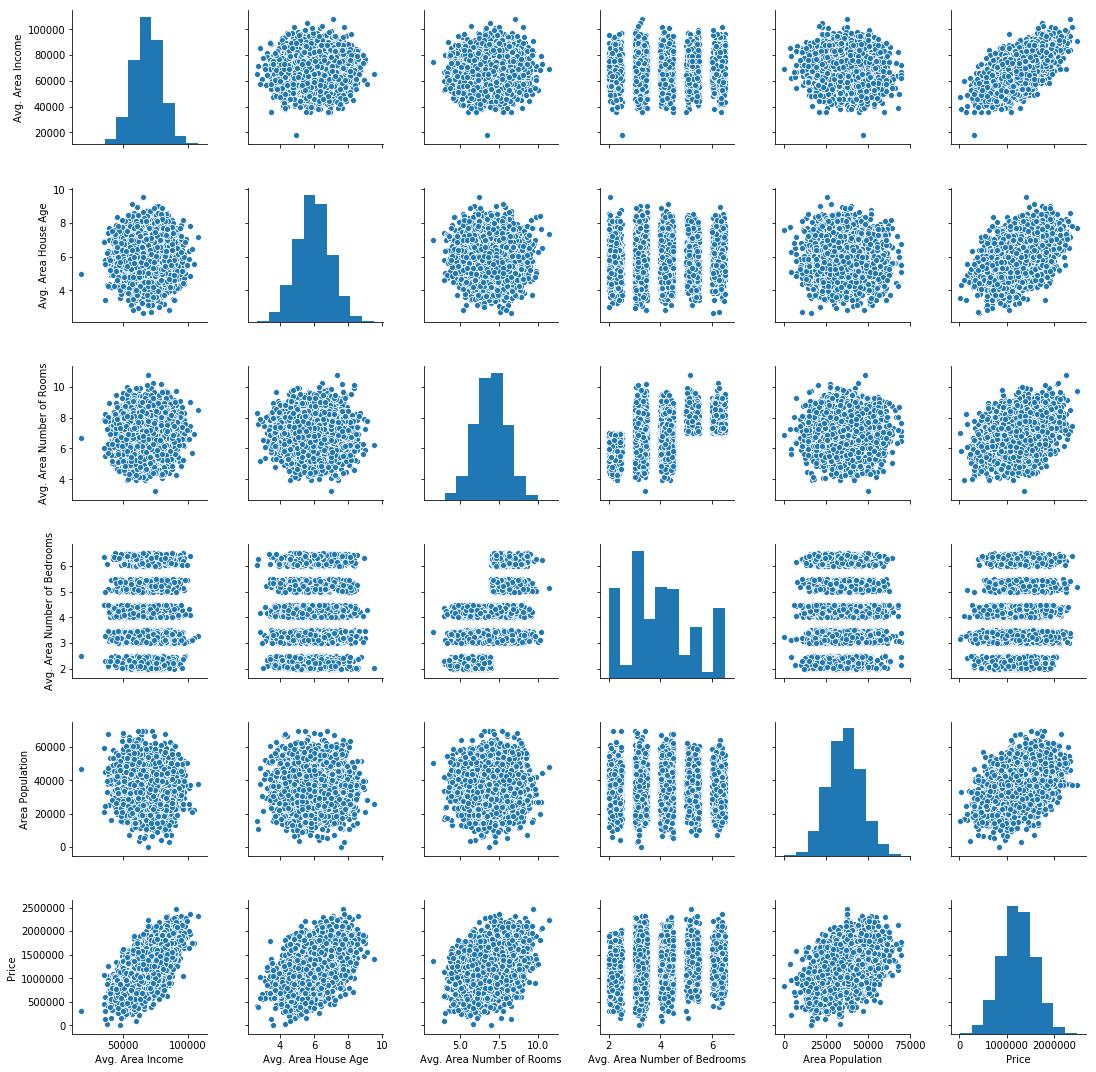

In [44]:
sns.pairplot(USAhousing)

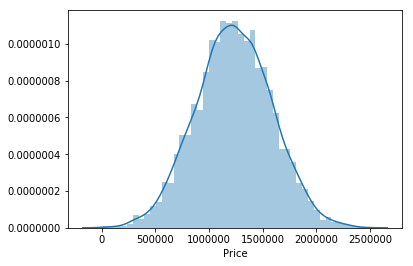

In [47]:
sns.distplot(USAhousing['Price'])

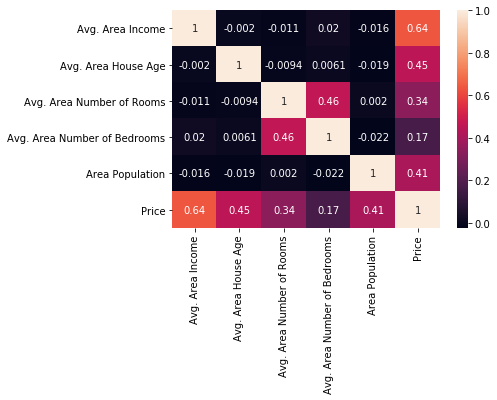

In [46]:
sns.heatmap(USAhousing.corr(),annot=True)

In [50]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

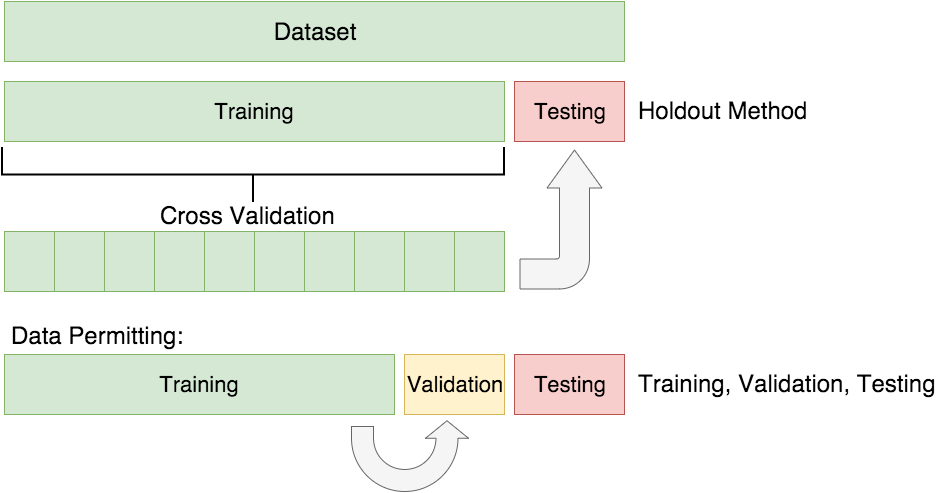

**Residual Histogram**

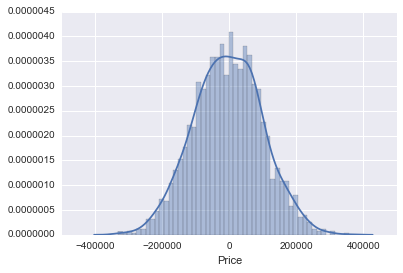

In [281]:
sns.distplot((y_test-predictions),bins=50);

# Decision Trees

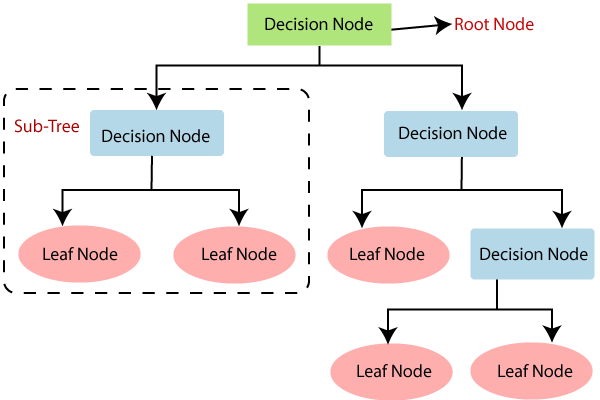

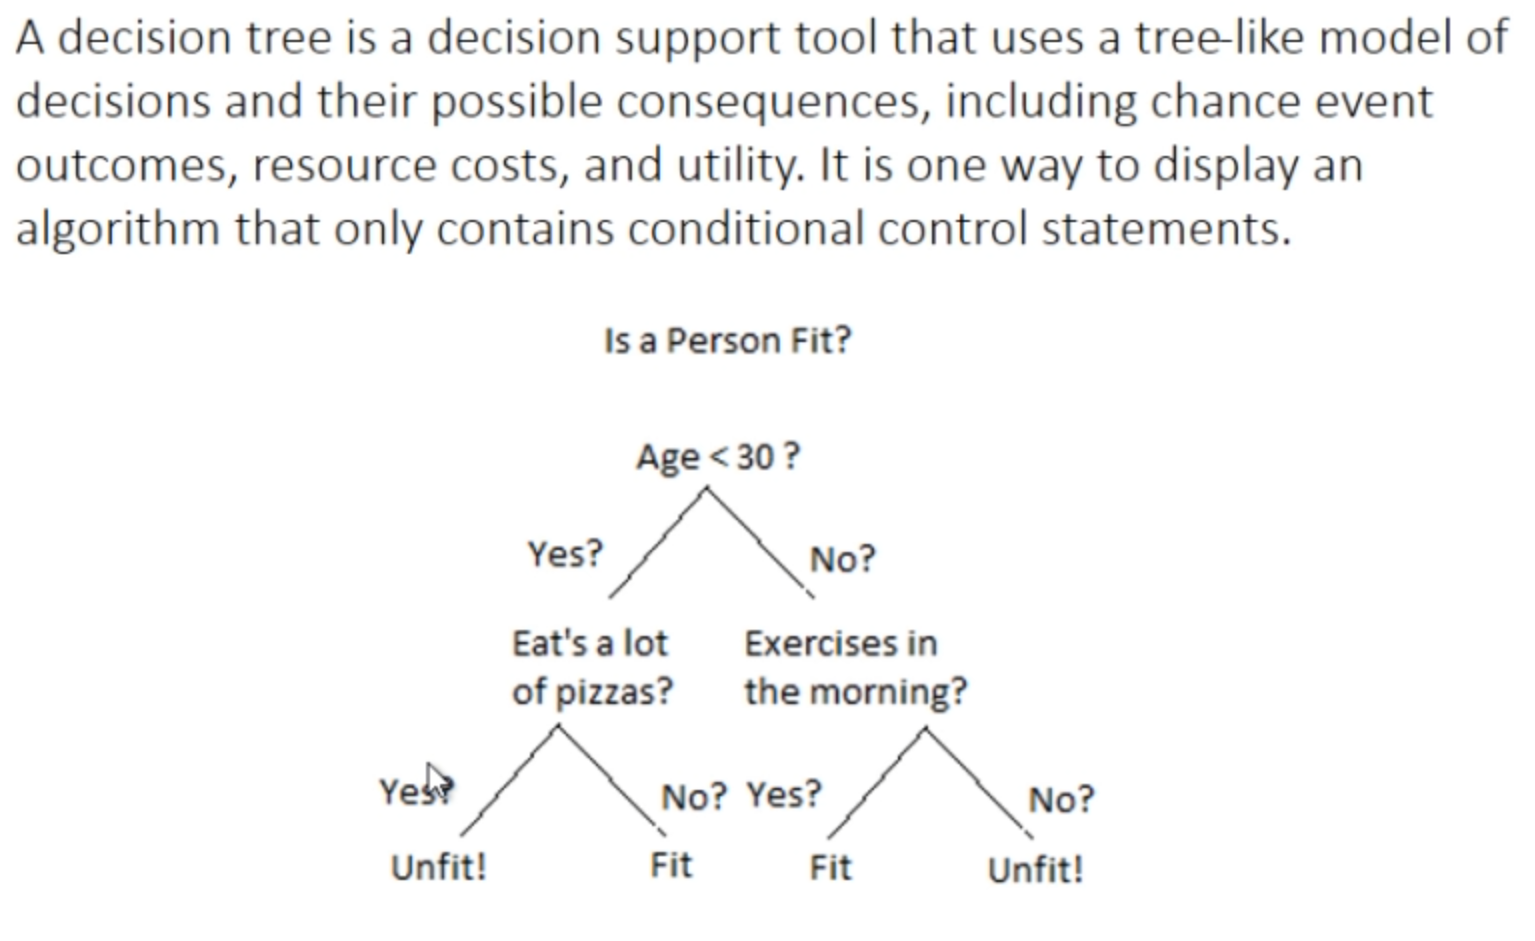

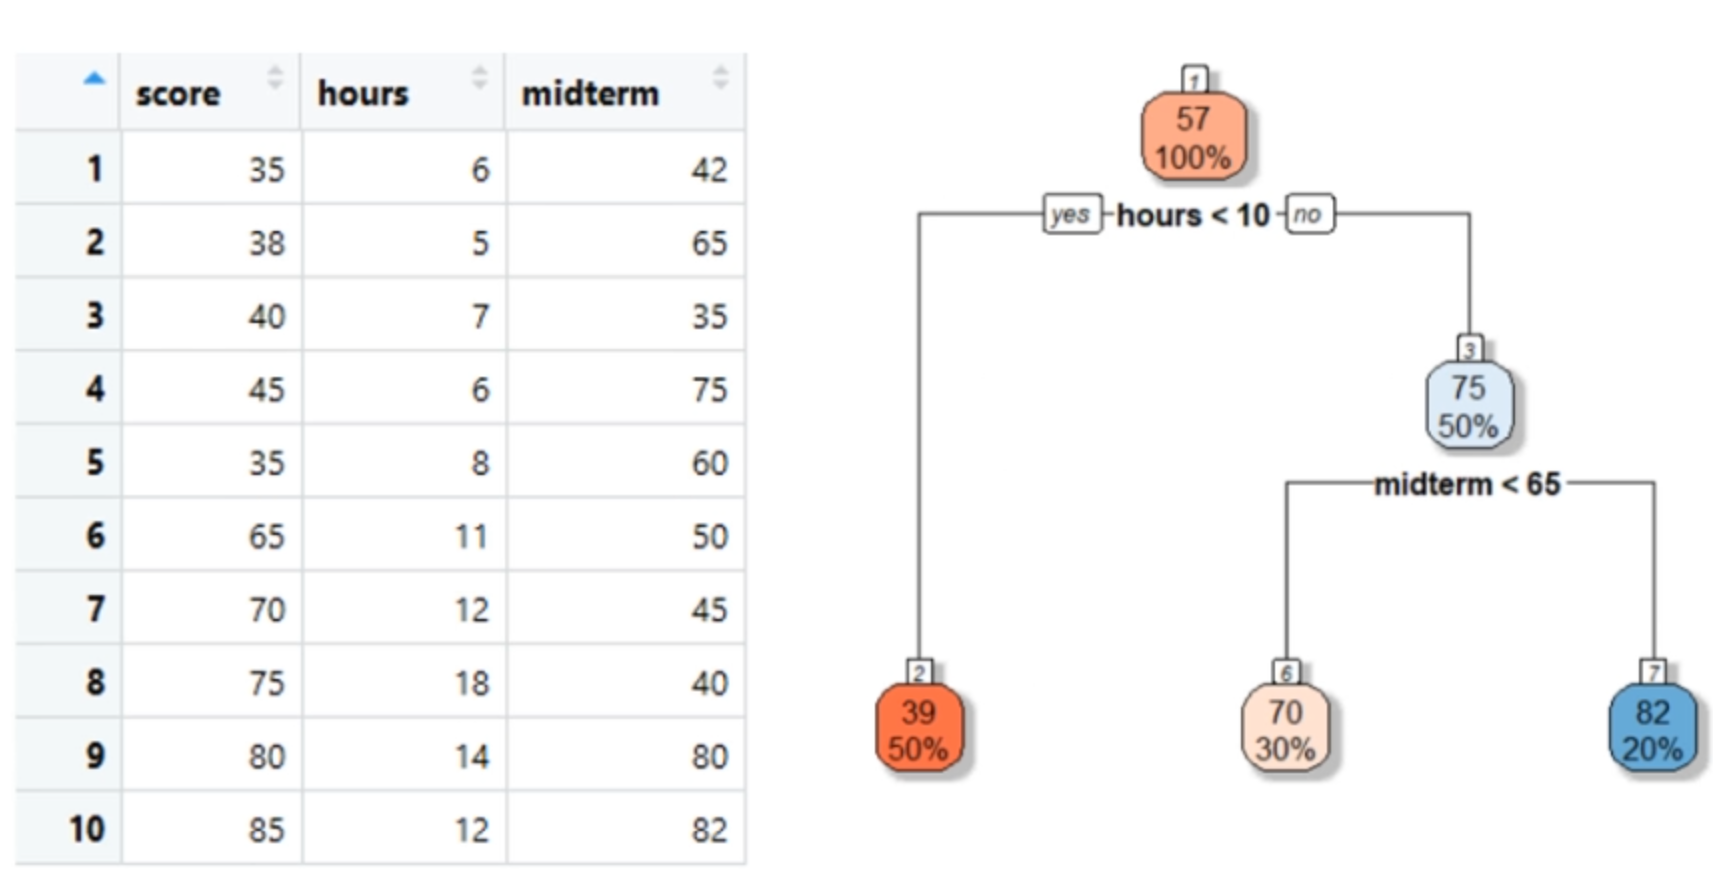

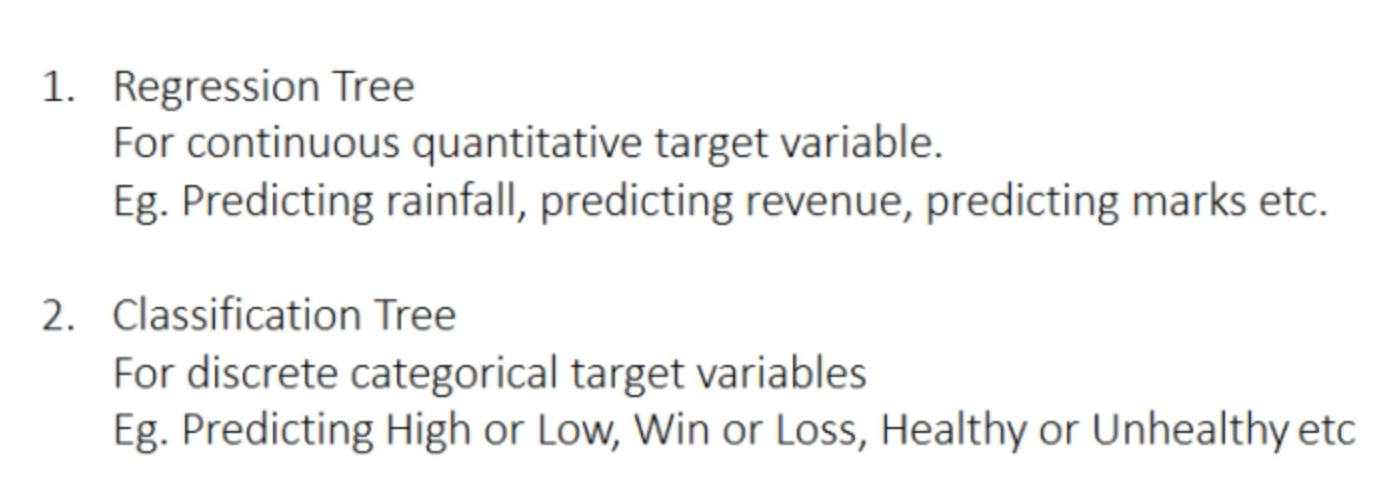

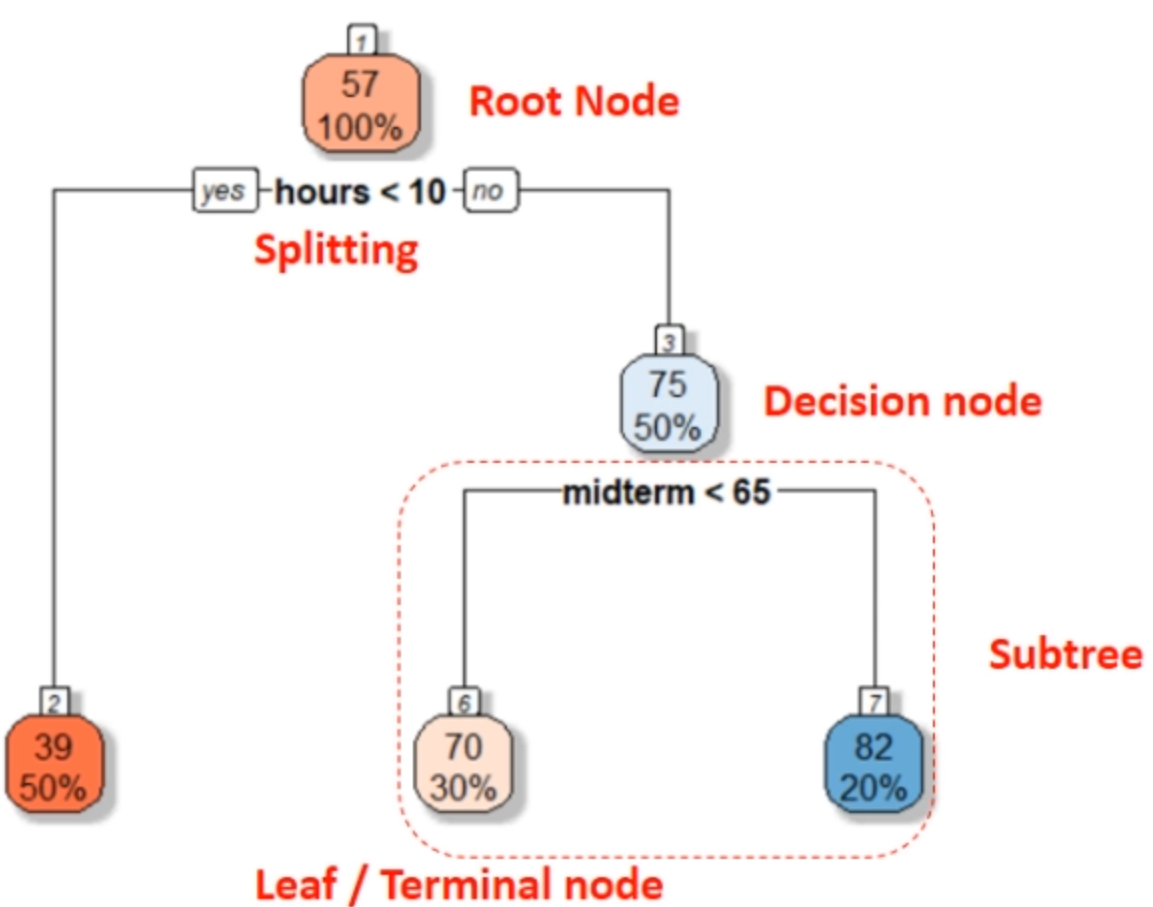

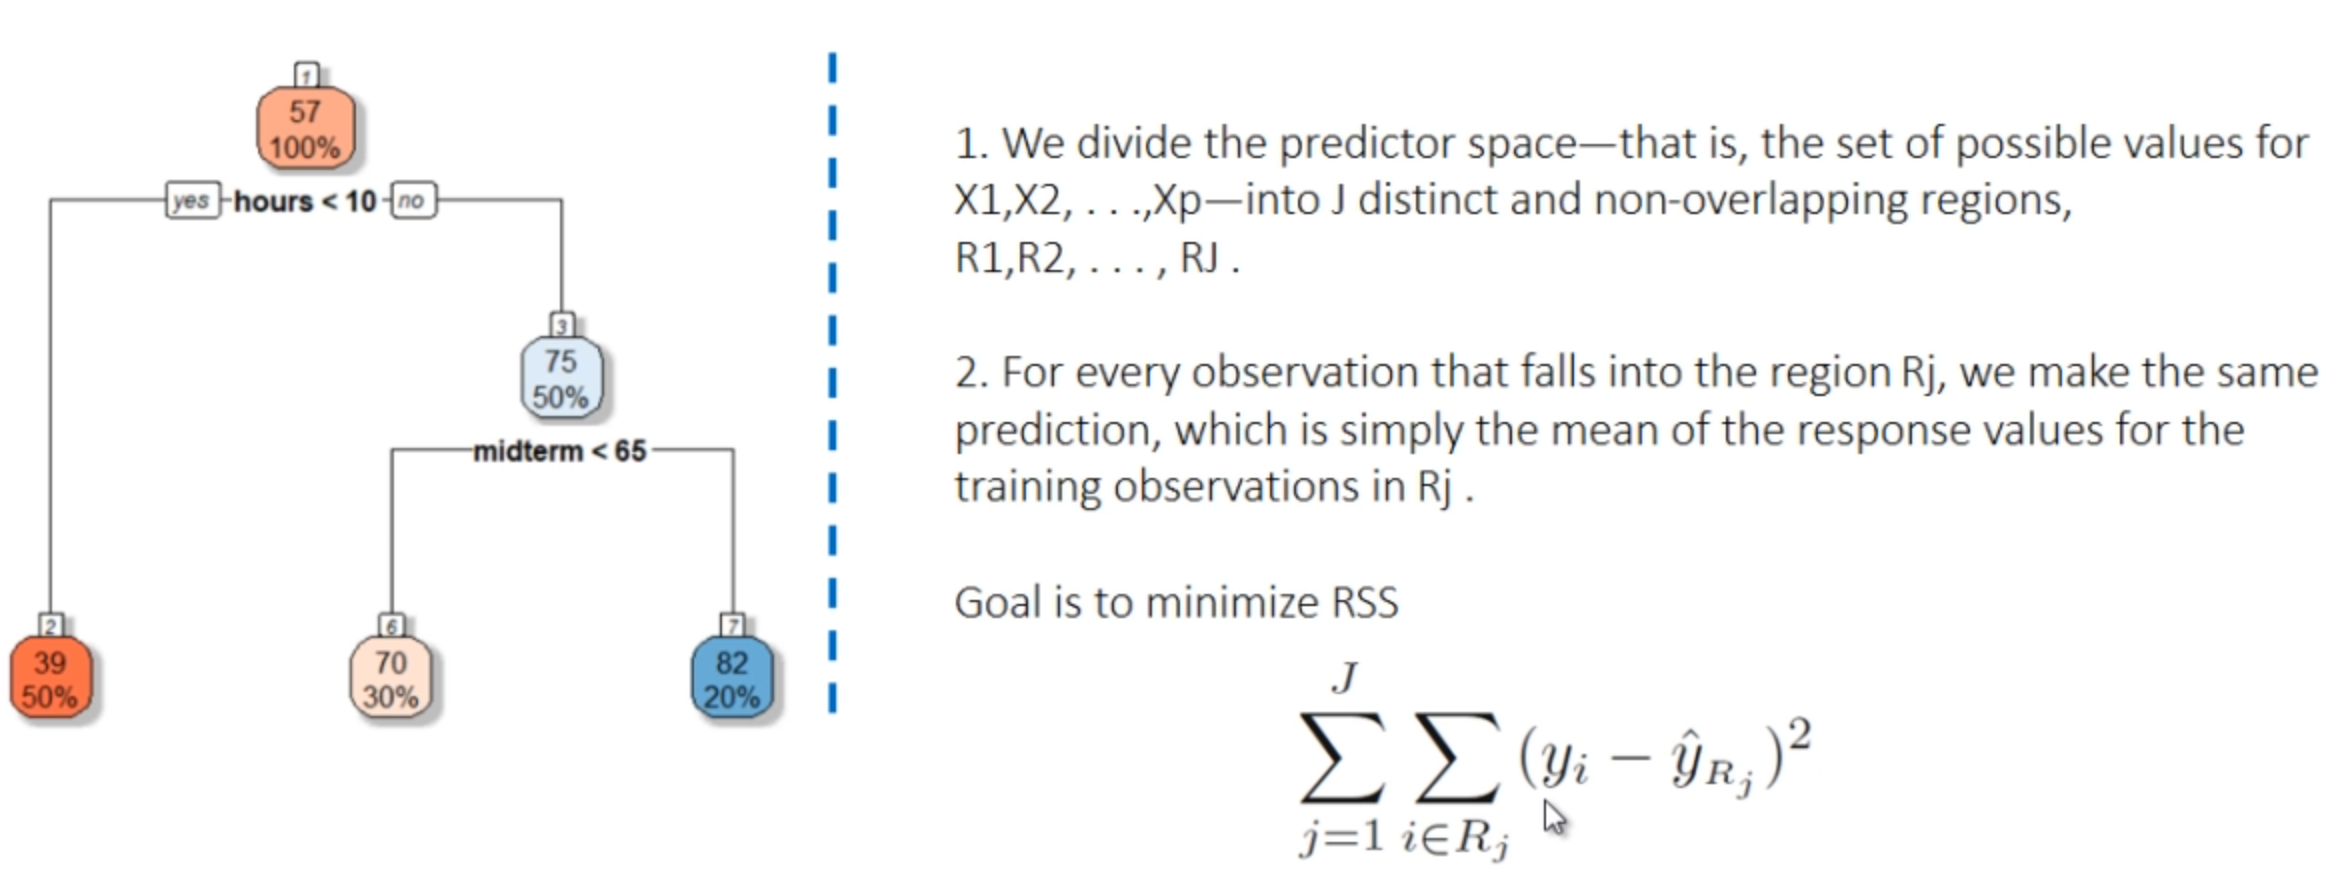

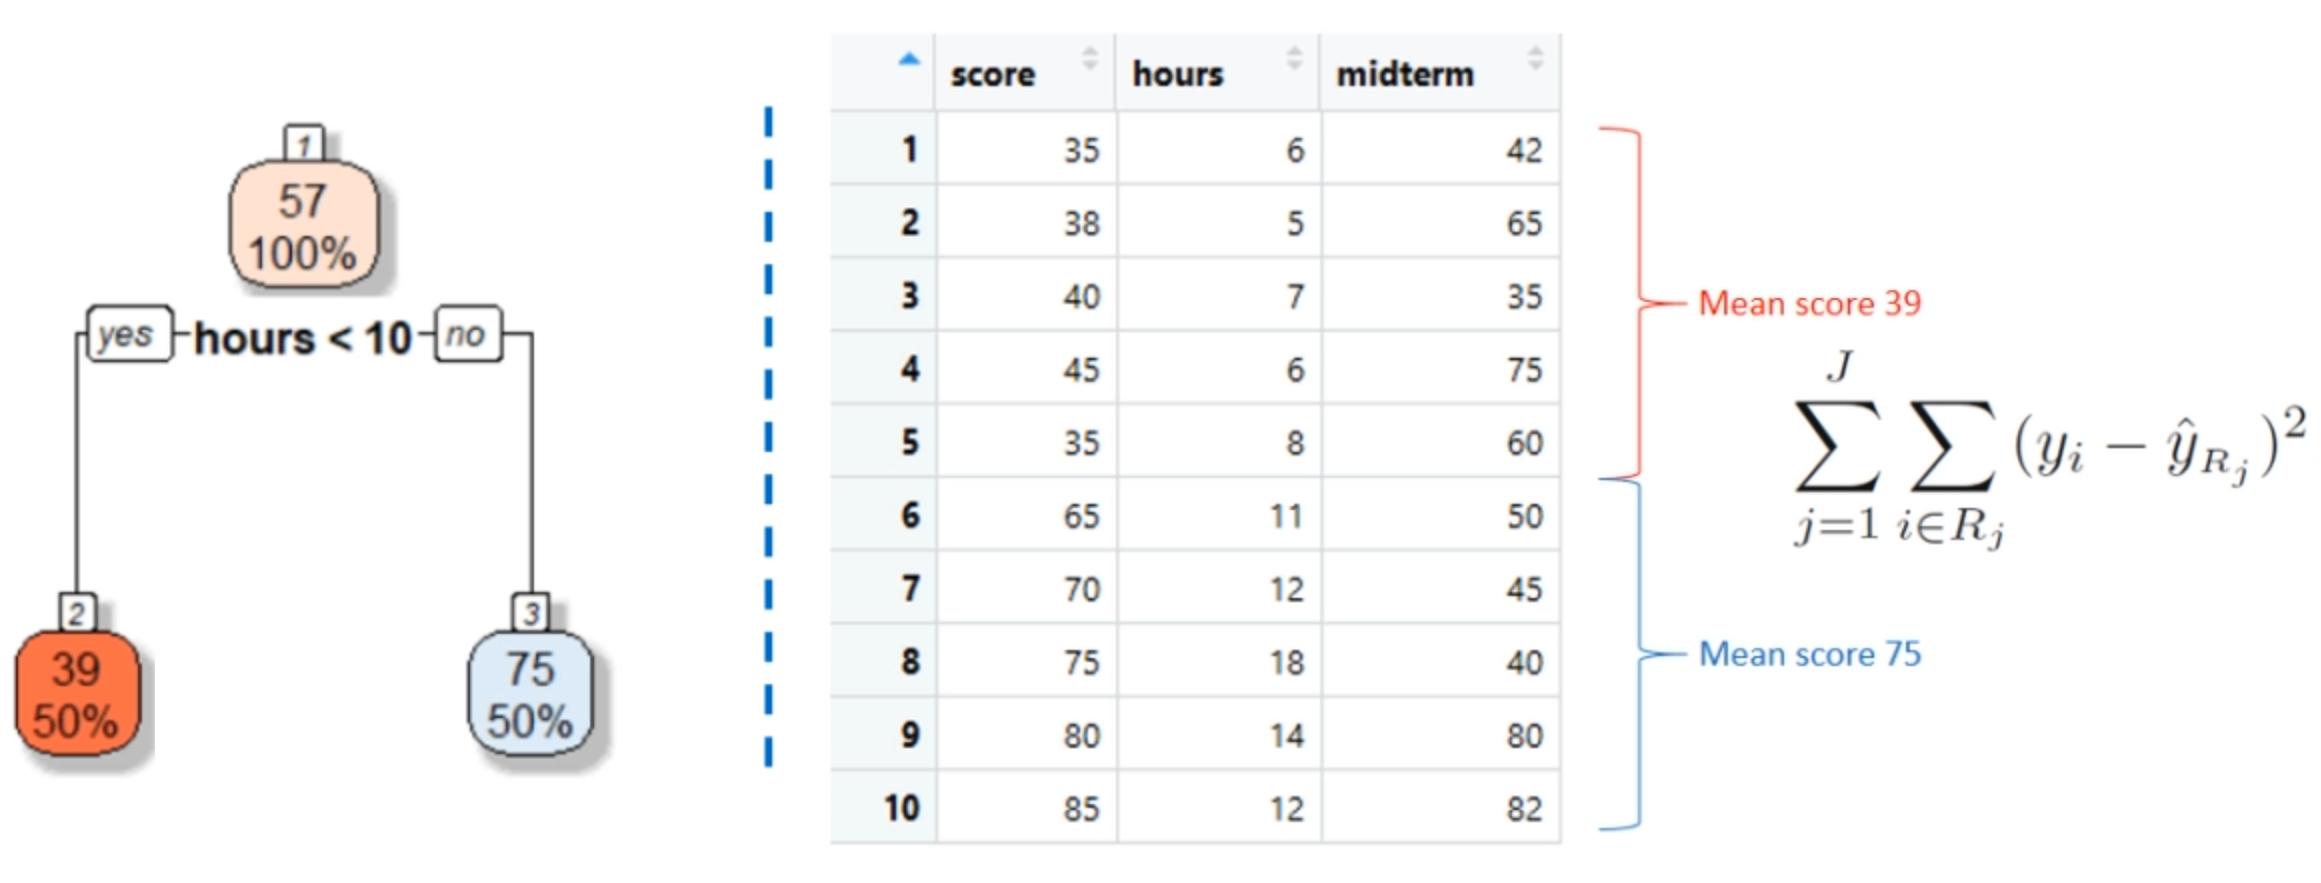

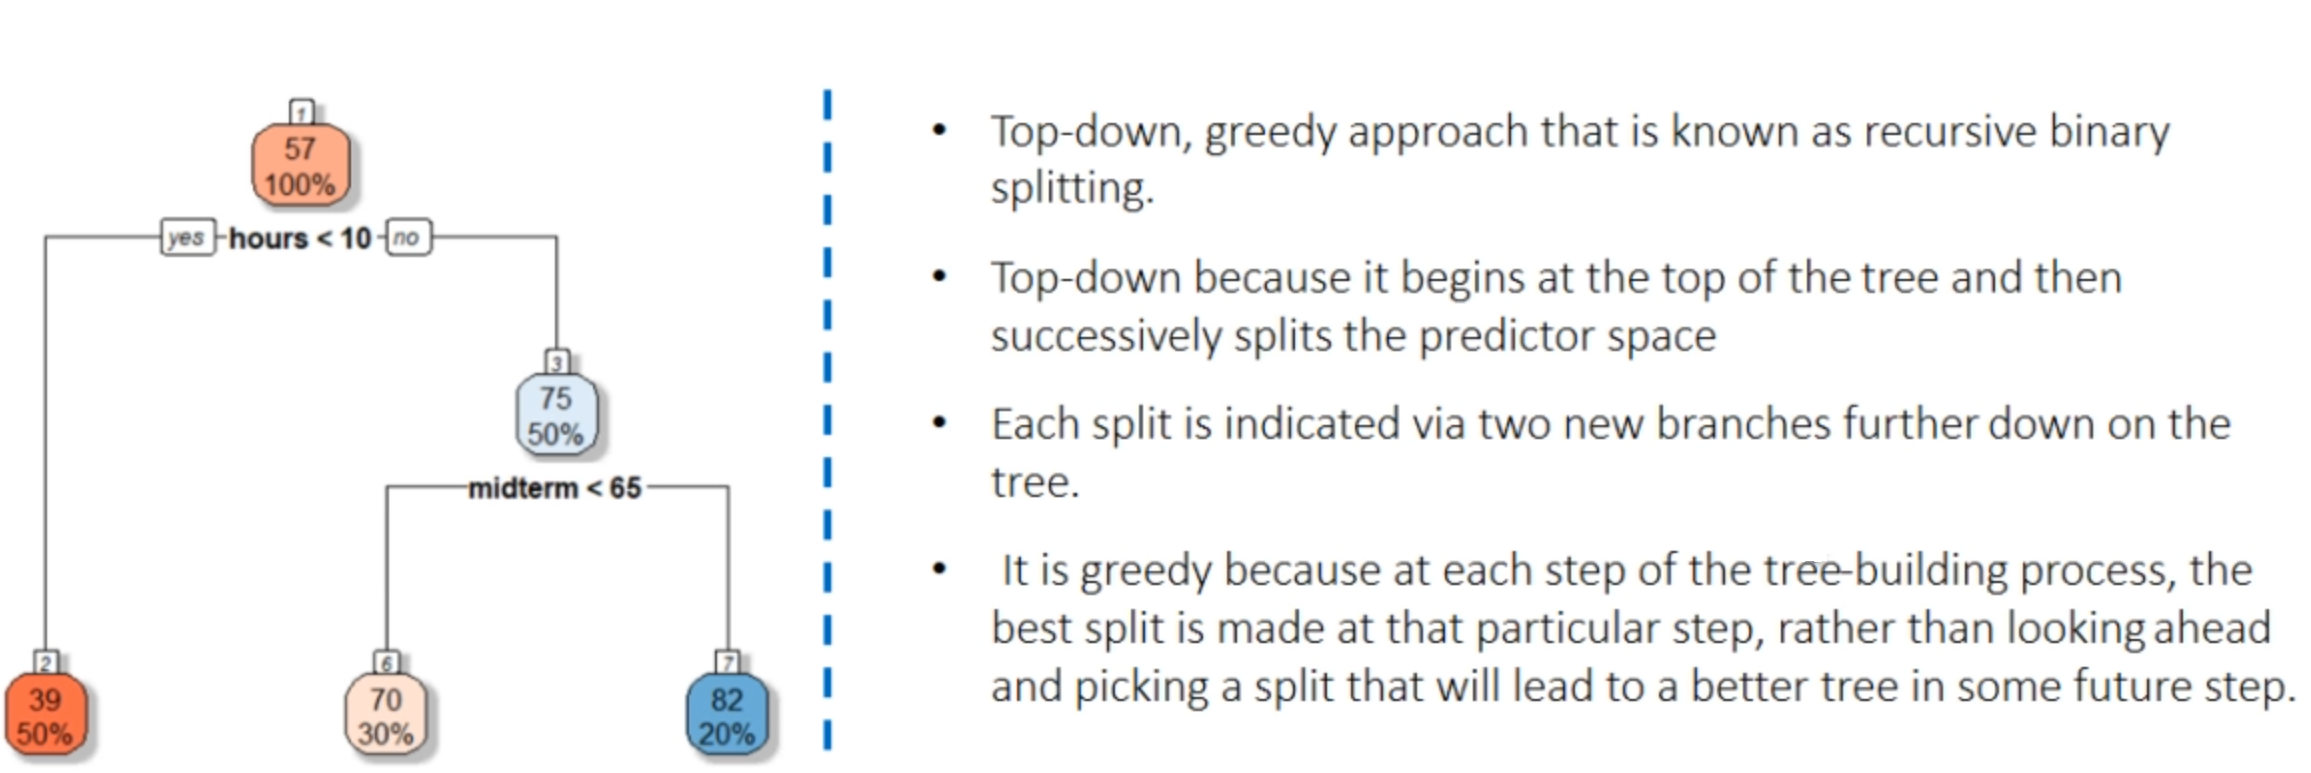

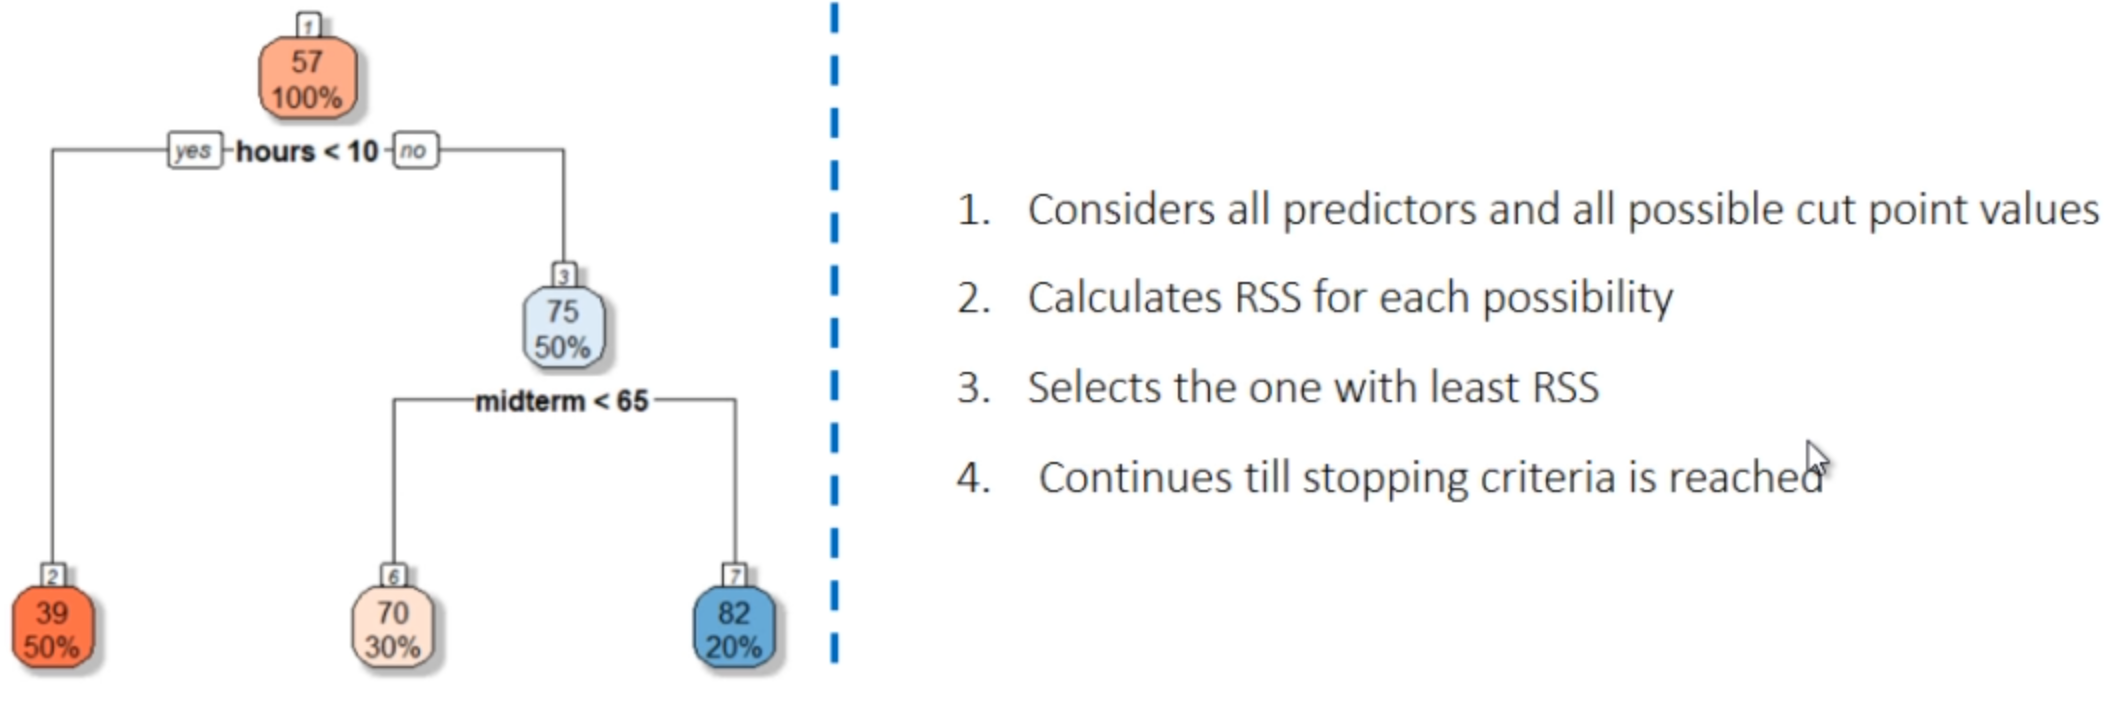

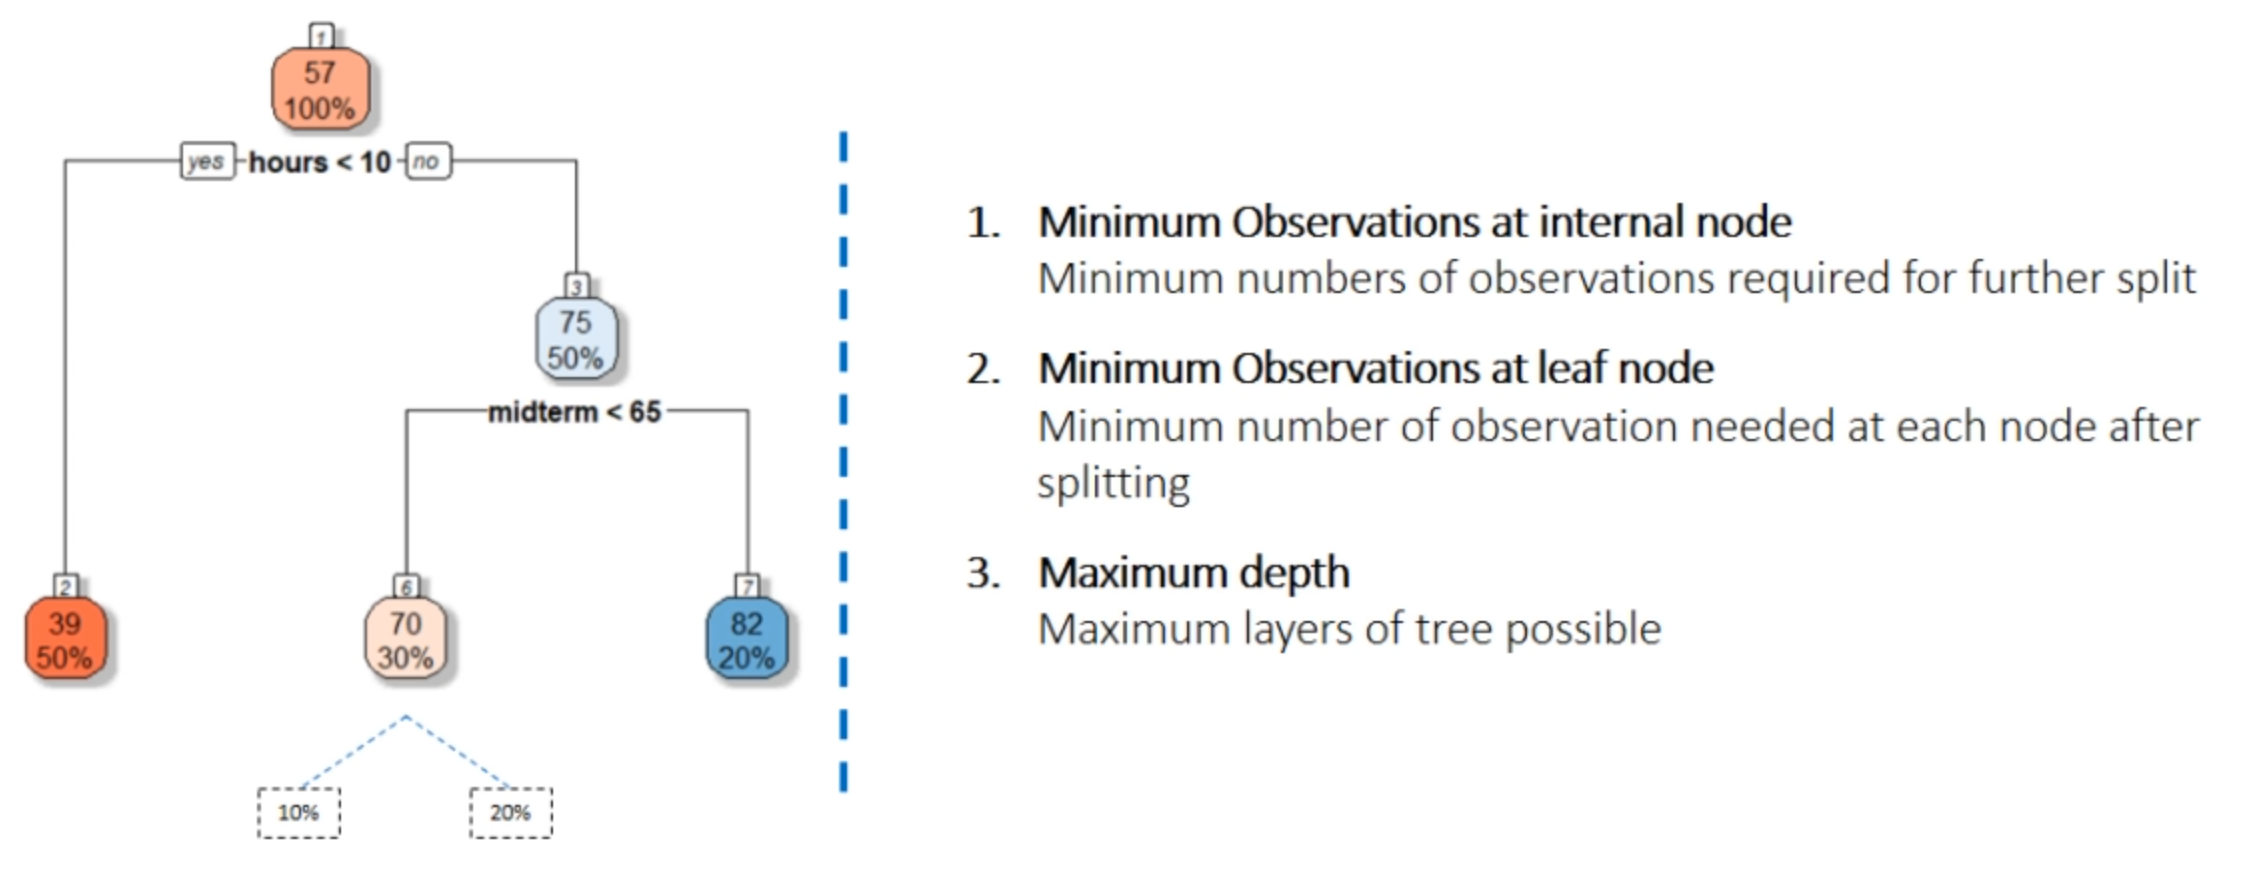

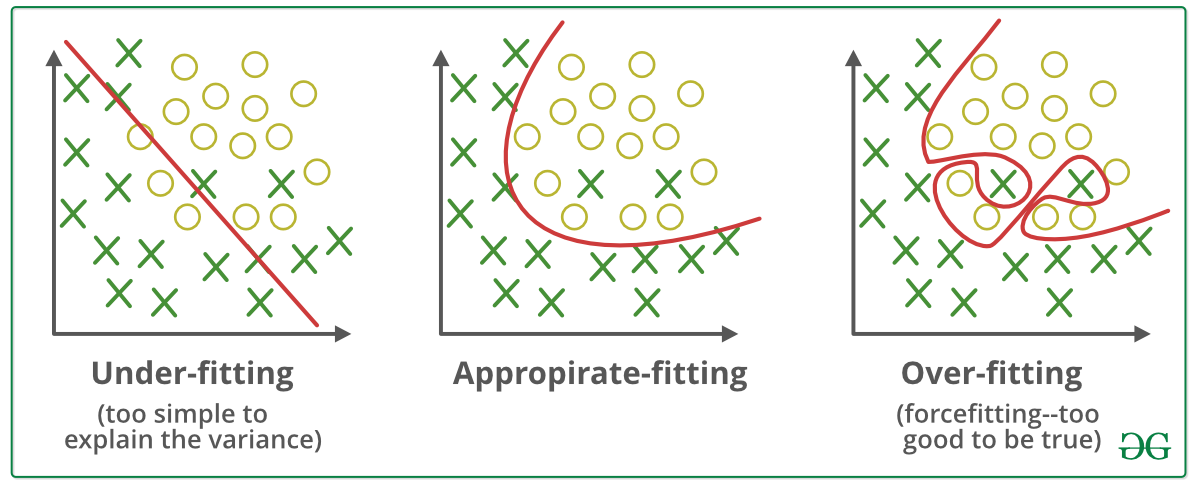

One of the most important mechanisms in machine learning is to train your algorithm on a training set that is separate and distinct from the test set for which you'll gauge its accuracy. Failure to do this will result in a model that may not generalize to yet unseen data. ... This can easily lead to poor generalization.

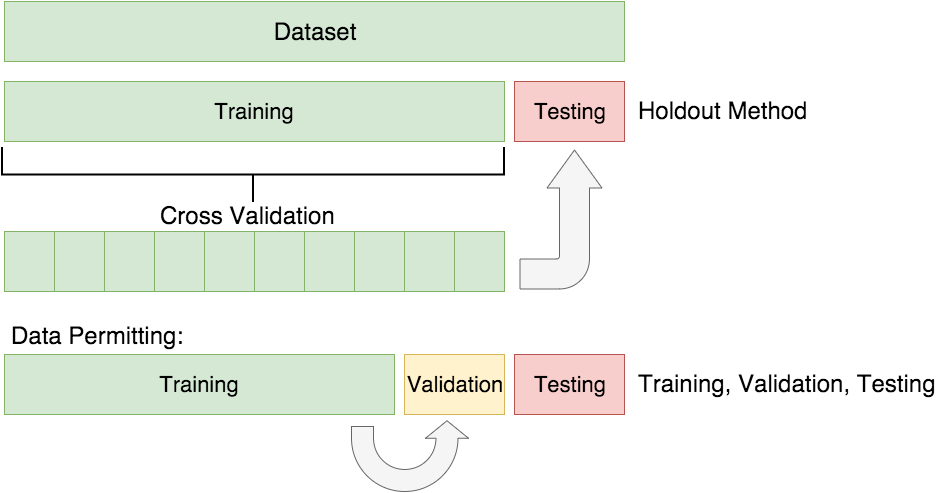

# Random Forest

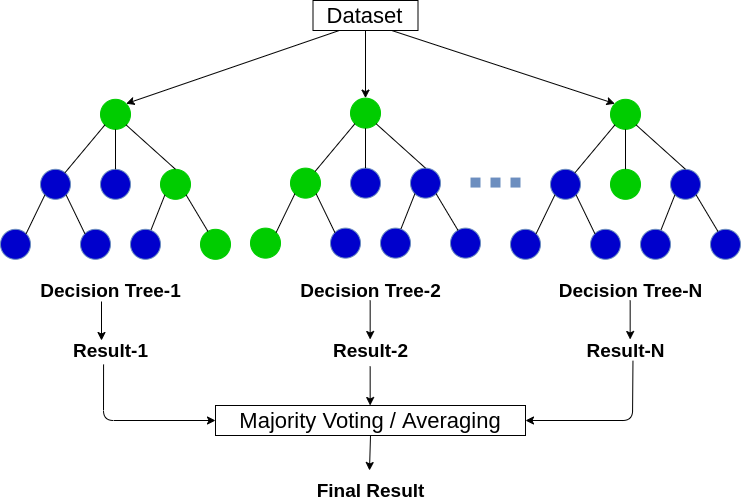

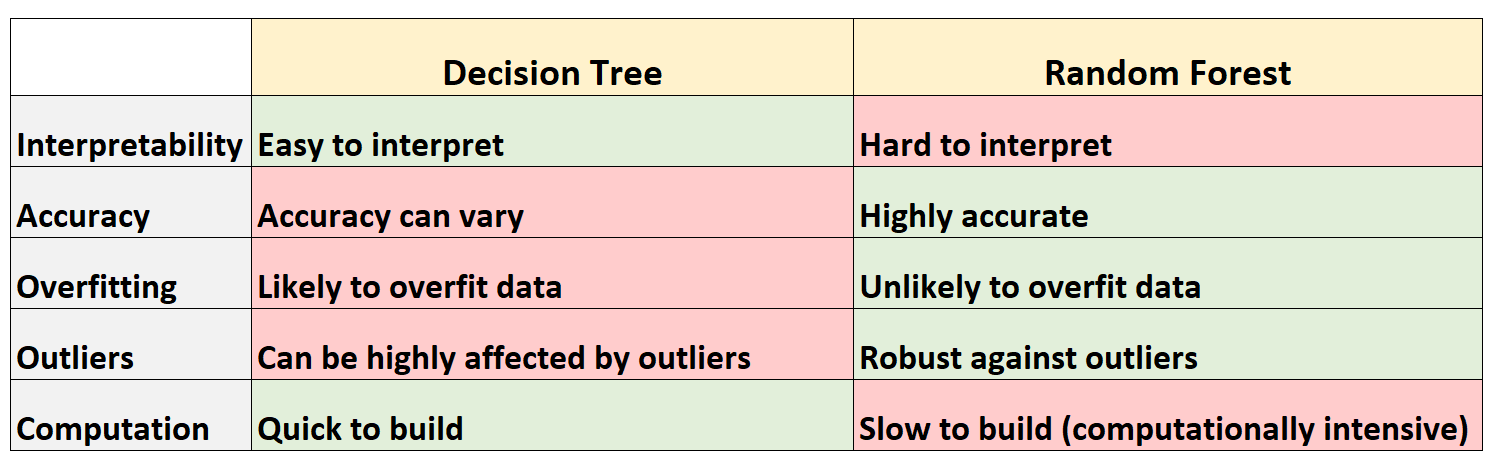

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [54]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

In [55]:
from sklearn.ensemble import RandomForestRegressor

Pearson r: Is the correlation coefficientis which measures the linear correlation between two sets of data. 

In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variation in the dependent variable that is predictable from the independent variable(s).

In machine learning, a hyperparameter is a parameter whose value is used to control the learning process.

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25,random_state=18)
rf = RandomForestRegressor()

rf.fit(X_train,Y_train)
preds = rf.predict(X_test)

print('Testing Accuracy')
One = pearsonr(Y_test,preds)
print(One[0])

print('Training Accuracy')
preds_train = rf.predict(X_train)

One = pearsonr(Y_train,preds_train)
print(One[0])

print('R2 Score')
One = r2_score(Y_test,preds)
print(One)

Testing Accuracy
0.9306684789472874
Training Accuracy
0.9882605258643066
R2 Score
0.8659318432737454


The Histogram of the Residual can be used to check whether the variance is normally distributed. If the histogram indicates that random error is not normally distributed, it suggests that the model's underlying assumptions may have been violated.

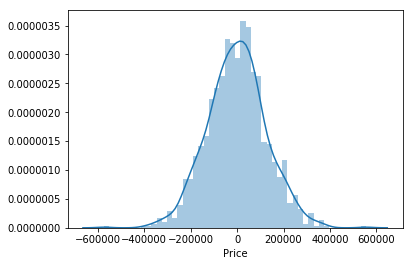

In [57]:
sns.distplot((Y_test-preds),bins=50);

In [58]:
print('MAE:', metrics.mean_absolute_error(Y_test, preds))
print('MSE:', metrics.mean_squared_error(Y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, preds)))

MAE: 99461.82921002399
MSE: 16129688400.841948
RMSE: 127002.71021061695


# Grid Search CV

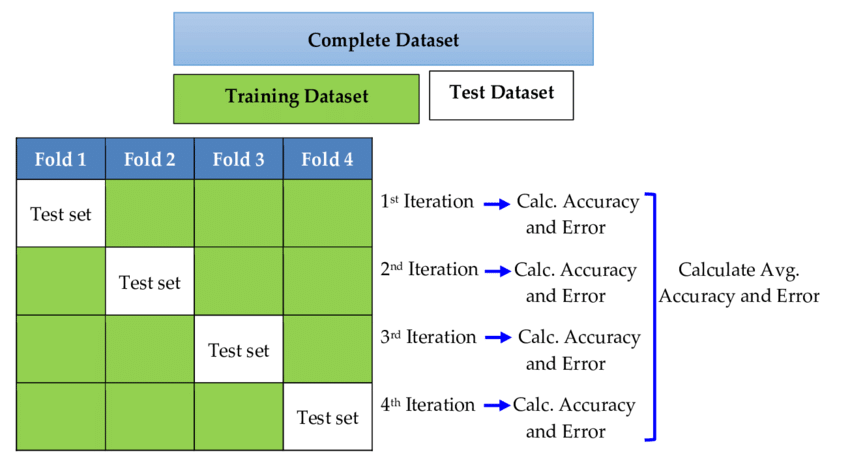

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'n_estimators': [50,60,70,80,90,100,200,300,400,500,700,900,1000],
    'min_samples_split':[2,3,4,5,6],
    'min_samples_leaf':[1,2,3,4,5,6],
    'bootstrap':[True,False]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2,scoring='r2')


# Fit the grid search to the data
grid_search.fit(X, Y)
grid_search.best_params_

best_grid = grid_search.best_estimator_
#print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))